In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import RMSprop
import pylab as plt
from keras.utils import np_utils  

In [2]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                       
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [5]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [7]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Base Model

In [8]:
model = Sequential()
model.add(Conv2D(24,kernel_size=5,padding='same',strides = (1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(48,kernel_size=5,padding='same',strides = (1,1),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 48)        28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               602368    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1740 - accuracy: 0.9465
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0471 - accuracy: 0.9854
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0176 - accuracy: 0.9944


In [10]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9905
Test loss: 0.02605663798749447
Test accuracy: 0.9904999732971191


Prediction
 [1.4285625e-05 3.2545668e-06 1.0898305e-04 1.4931994e-05 9.8452550e-01
 1.1696267e-06 7.6423697e-07 8.2053011e-04 1.3537141e-02 9.7347342e-04]
4


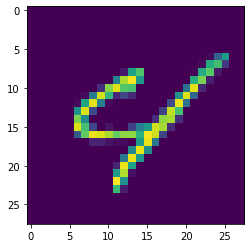

In [11]:
prediction = model.predict(X_test[420:421])
prediction = prediction[0]
print('Prediction\n',prediction)
print(np.argmax(prediction))
plt.imshow(X_test[420:421].reshape(28,28))

Number of filters: Run CNN with 1 convolution hidden layer (32 filters of 3*3), flatten
layer and output layer, (with any activation function and any optimizer) for 5 epochs.
Change number of filters as 4, 32, 128, 512, 2056. What is the training and testing
accuracies? Print the number of parameters of the model and training time for each of
these configurations.

32 filters of 4*4, flatten layer and output layer,

In [12]:
def define_model1():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())

  model.add(Dense(100,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model 

In [13]:
model=define_model1()
history=model.fit(X_train,Y_train,epochs=10,batch_size=32,validation_data=(X_test,Y_test),verbose=0)
_,acc=model.evaluate(X_test,Y_test,verbose=0)
print('%.3f'%(acc*100.0))


98.660


In [14]:
model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 4.18828614e-02,  1.03323646e-01,  3.63076152e-03,
            2.12032691e-01, -6.27108395e-01,  1.42385885e-01,
           -2.66067684e-02,  2.88600296e-01, -4.83424425e-01,
           -2.22284034e-01, -2.61196941e-01,  4.37907845e-01,
            1.98764861e-01, -7.39167705e-02, -1.24610677e-01,
           -5.02076757e-04, -3.35771561e-01,  1.87398270e-01,
           -4.67841059e-01, -5.95314018e-02,  2.76151508e-01,
            2.81588197e-01, -2.64756620e-01,  1.39124408e-01,
           -1.53618271e-03, -4.94350225e-01, -6.13952398e-01,
            2.53444612e-01,  2.26327971e-01, -2.83882707e-01,
           -2.72234261e-01,  7.49316439e-02]],
 
         [[-1.59812838e-01, -6.34074956e-02,  2.71994174e-01,
           -8.80369022e-02, -1.15005627e-01,  1.08844310e-01,
            5.80347665e-02,  3.42005938e-01, -5.24664283e-01,
           -6.26043556e-03,  5.47146574e-02,  2.13594791e-02,
       

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [16]:
scores,histories=list(),list()
scores.append(acc)
histories.append(history)

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

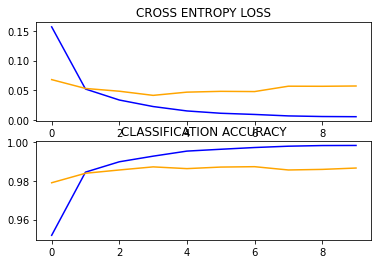

In [20]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2,1,1)
    pyplot.title('CROSS ENTROPY LOSS')
    pyplot.plot(histories[i].history['loss'],color='blue',label='train')
    pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
    pyplot.subplot(2,1,2)
    pyplot.title('CLASSIFICATION ACCURACY')
    pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
    pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
  pyplot.show()

summarize_diagnostics(histories)